<a href="https://colab.research.google.com/github/AmeliaAdhariani/Skripsi/blob/main/Clustering_Bulanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Import Data

In [ ]:
file_path = '/content/Data6.xlsx'
data = pd.read_excel(file_path)
data.head()

,Wilayah,Bulan,Anirat,Curat,Curas,Curanmor,Peras/ Anc
0,A,Januari,9,10,0,36,2
1,B,Januari,1,9,2,11,0
2,C,Januari,1,6,1,49,1
3,D,Januari,6,11,0,36,2
4,E,Januari,2,4,0,13,1


# Data Understanding

In [ ]:
# Melihat kolom dari dataset
data.columns

Index(['Wilayah', 'Bulan', 'Anirat', 'Curat', 'Curas', 'Curanmor',
       'Peras/ Anc'],
      dtype='object')

In [ ]:
!pip install altair
import altair as alt
# Define the correct order of months
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Calculate the total crime for each month
data_monthly_total = data.groupby('Bulan').sum().reset_index()

# Create a new column 'Total_Crime' by summing crime types
data_monthly_total['Total_Crime'] = data_monthly_total[['Curat', 'Curas', 'Curanmor', 'Anirat', 'Peras/ Anc']].sum(axis=1)


# Create the bar chart with the correct month order
alt.Chart(data_monthly_total).mark_bar().encode(
    x=alt.X('Bulan:N', sort=month_order, axis=alt.Axis(title='Month')),
    y='Total_Crime:Q',
    color=alt.Color('Bulan:N', sort=month_order), # Sort colors by month order
    tooltip=[
        alt.Tooltip('Bulan', title='Month'),
        alt.Tooltip('Curat', title='Curat'),
        alt.Tooltip('Curas', title='Curas'),
        alt.Tooltip('Curanmor', title='Curanmor'),
        alt.Tooltip('Anirat', title='Anirat'),
        alt.Tooltip('Peras/ Anc', title='Peras/Anc'),
        alt.Tooltip('Total_Crime', title='Total Crime')
    ]
).properties(
    title='Jumlah Kejahatan Berdasarkan Bulan',
    width=600,
    height=400
).interactive()


alt.Chart(...)

## Informasi Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Wilayah     132 non-null    object
 1   Bulan       132 non-null    object
 2   Anirat      132 non-null    int64 
 3   Curat       132 non-null    int64 
 4   Curas       132 non-null    int64 
 5   Curanmor    132 non-null    int64 
 6   Peras/ Anc  132 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.3+ KB


In [ ]:
data.describe()

,Anirat,Curat,Curas,Curanmor,Peras/ Anc
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2.712121,4.265152,0.227273,12.522727,0.719697
std,2.835248,3.899226,0.546898,16.700535,1.180726
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,4.000000,0.000000,6.000000,0.000000
75%,4.000000,6.000000,0.000000,19.250000,1.000000
max,13.000000,21.000000,2.000000,103.000000,7.000000


In [ ]:
data.shape

(132, 7)

## Data Cleaning

In [ ]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Wilayah       0
Bulan         0
Anirat        0
Curat         0
Curas         0
Curanmor      0
Peras/ Anc    0
dtype: int64


# Standarisasi

In [ ]:
# Mengatasi missing values dengan SimpleImputer (mean)
numerical_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Standarisasi data numerik
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Menampilkan data setelah standarisasi
print(data.head())


  Wilayah    Bulan    Anirat     Curat     Curas  Curanmor  Peras/ Anc
0       A  Januari  2.226201  1.476369 -0.417150  1.411135    1.088467
1       B  Januari -0.606170  1.218930  3.253768 -0.091526   -0.611860
2       C  Januari -0.606170  0.446616  1.418309  2.192519    0.238303
3       D  Januari  1.164062  1.733807 -0.417150  1.411135    1.088467
4       E  Januari -0.252124 -0.068260 -0.417150  0.028687    0.238303


## Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Memilih kolom numerik (mengabaikan kolom "Wilayah" dan "Bulan")
data_numerical = data.select_dtypes(include=np.number)  # Select only numeric columns

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data_numerical)
data_min_max_scaled_df = pd.DataFrame(data_min_max_scaled, columns=data_numerical.columns)

# Menampilkan hasil
print("Data setelah Min-Max Scaling:")
print(data_min_max_scaled_df.head())

Data setelah Min-Max Scaling:
     Anirat     Curat  Curas  Curanmor  Peras/ Anc
0  0.692308  0.476190    0.0  0.349515    0.285714
1  0.076923  0.428571    1.0  0.106796    0.000000
2  0.076923  0.285714    0.5  0.475728    0.142857
3  0.461538  0.523810    0.0  0.349515    0.285714
4  0.153846  0.190476    0.0  0.126214    0.142857


# Modelling (Pemodelan)

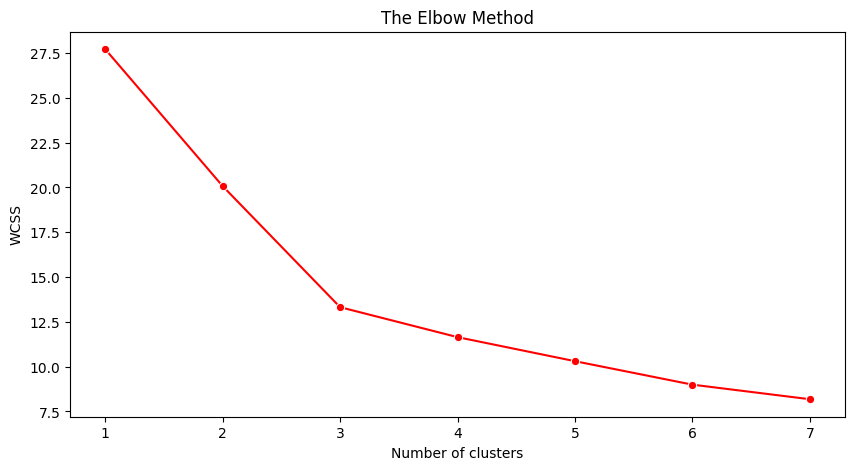

In [ ]:
import seaborn as sns
# Elbow method using the preprocessed data (data_min_max_scaled_df)
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_min_max_scaled_df) # Use the normalized data
    wcss.append(kmeans.inertia_)

# Create a DataFrame for the Elbow Method data
elbow_data = pd.DataFrame({'Number of Clusters': range(1, 8), 'WCSS': wcss})

plt.figure(figsize=(10, 5))
# Use the DataFrame with x and y parameters
sns.lineplot(x='Number of Clusters', y='WCSS', data=elbow_data, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Initialize PCA with the desired number of components (e.g., 2)
pca = PCA(n_components=2)

# Fit PCA to your data and transform it
pca_features = pca.fit_transform(data_min_max_scaled_df)

# Now you can use 'pca_features' in your KMeans code
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_features)

KMeans(n_clusters=3, n_init=10, random_state=42)

Closest Centroid for Each Data Point:
[2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


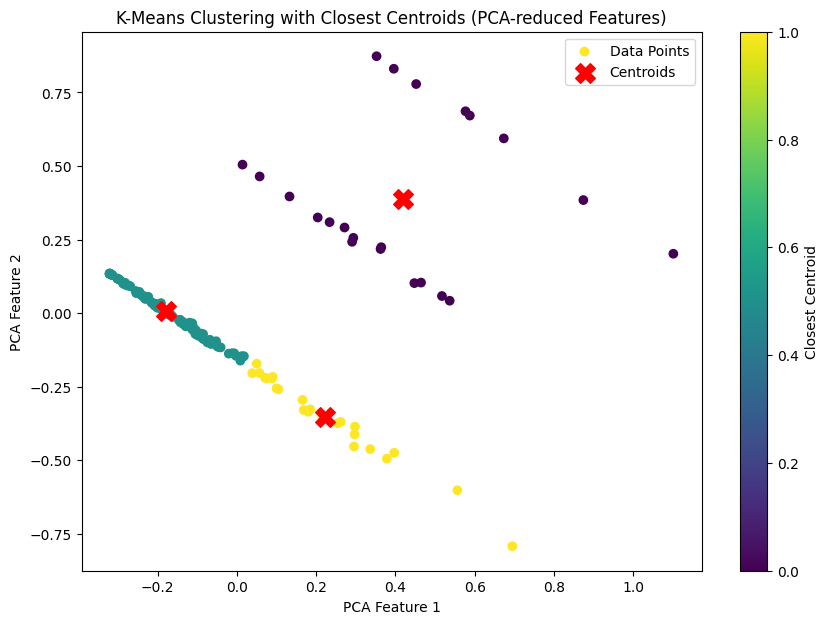

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Example: 3 clusters
kmeans.fit(pca_features)
centroids = kmeans.cluster_centers_
# Find the closest centroid for each data point
closest_centroids = []
for i in range(len(pca_features)):
    distances = np.linalg.norm(pca_features[i] - centroids, axis=1)
    closest_centroid_index = np.argmin(distances)
    closest_centroids.append(closest_centroid_index)

# Print the closest centroid for each data point
print("Closest Centroid for Each Data Point:")
print(closest_centroids)

# Visualize the closest centroids
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=closest_centroids, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Closest Centroids (PCA-reduced Features)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Closest Centroid')
plt.legend()
plt.show()

# Evaluation (Evaluasi)

In [ ]:
# Assuming 'data_min_max_scaled_df' is your preprocessed data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_min_max_scaled_df)

# Calculate Silhouette Score
for n_clusters in range(2, 8):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_features)
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.582575987713664
For n_clusters = 3, the average silhouette_score is : 0.5891830553695083
For n_clusters = 4, the average silhouette_score is : 0.5489527327120458
For n_clusters = 5, the average silhouette_score is : 0.5705438563376384
For n_clusters = 6, the average silhouette_score is : 0.5850720210553365
For n_clusters = 7, the average silhouette_score is : 0.5668398941138167


For n_clusters = 2, the average silhouette score is: 0.582575987713664


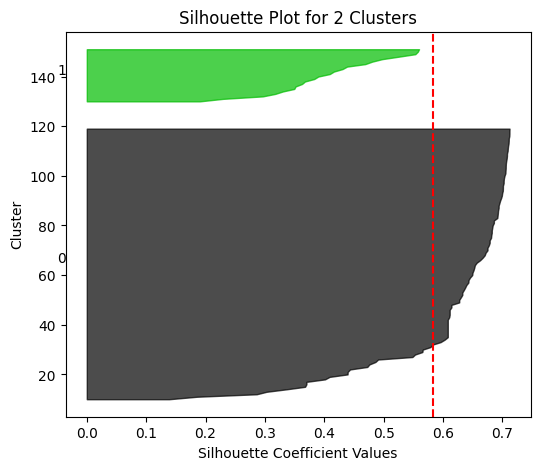

For n_clusters = 3, the average silhouette score is: 0.5891830553695083


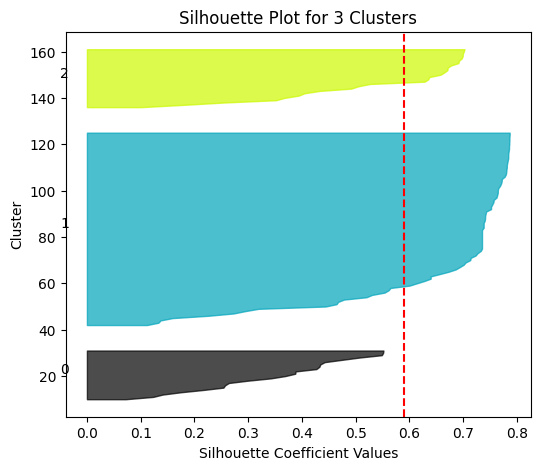

For n_clusters = 4, the average silhouette score is: 0.5489527327120458


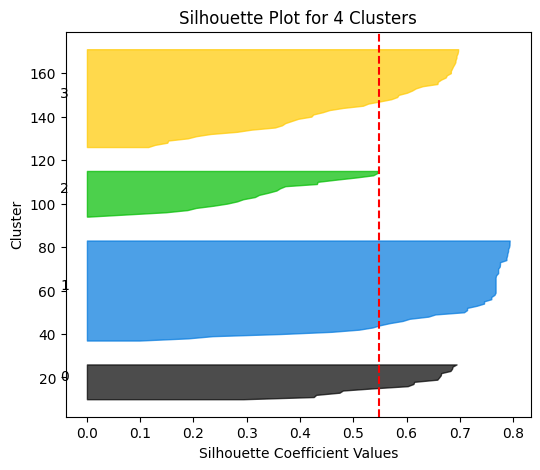

For n_clusters = 5, the average silhouette score is: 0.5705438563376384


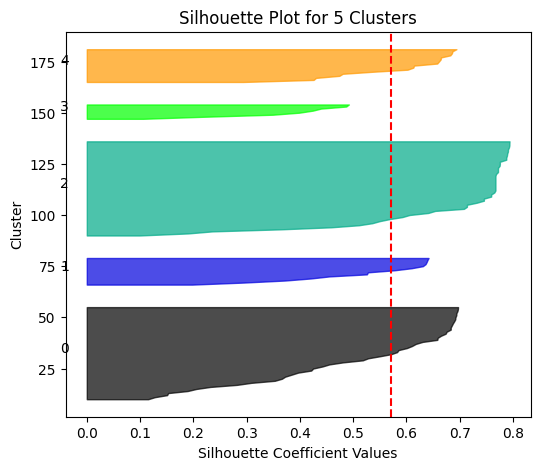

For n_clusters = 6, the average silhouette score is: 0.5850720210553365


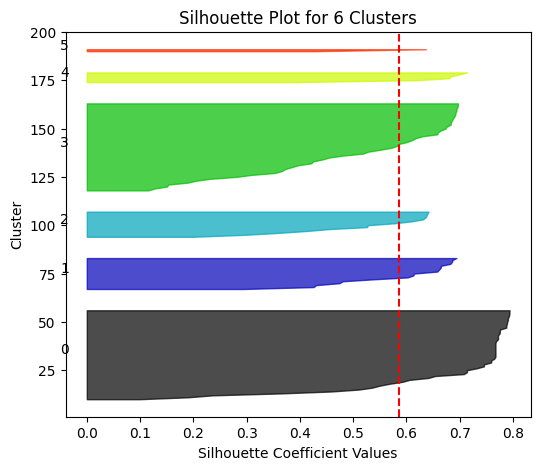

For n_clusters = 7, the average silhouette score is: 0.5668398941138167


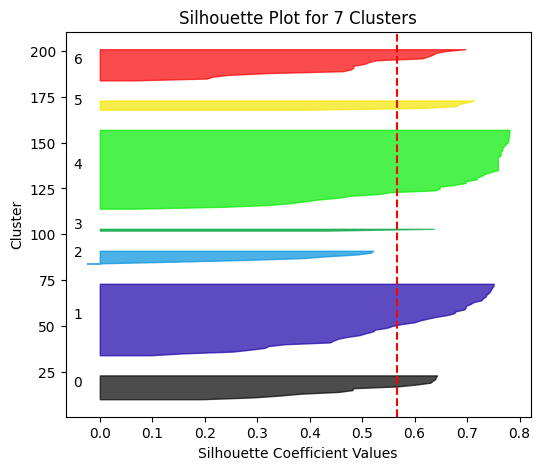

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_min_max_scaled_df)

# Import silhouette_samples
from sklearn.metrics import silhouette_samples

# Silhouette Analysis
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_features)
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    silhouette_values = silhouette_samples(pca_features, cluster_labels)
    y_lower = 10
    plt.figure(figsize=(6, 5))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Silhouette Plot for {n_clusters} Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

# Deployment (Penerapan)

In [ ]:
# Add the cluster labels to the original DataFrame
data['Cluster'] = closest_centroids

# Now 'data' contains the original data with an additional 'Cluster' column
print(data.head())

  Wilayah    Bulan  Anirat  Curat  Curas  Curanmor  Peras/ Anc  Cluster
0       A  Januari       9     10      0        36           2        2
1       B  Januari       1      9      2        11           0        0
2       C  Januari       1      6      1        49           1        0
3       D  Januari       6     11      0        36           2        2
4       E  Januari       2      4      0        13           1        1


In [ ]:
# Create a mapping from cluster labels to risk categories
cluster_mapping = {
    0: 'rawan',
    1: 'tidak rawan',
    2: 'sedang'
    # Add more mappings if you have more clusters
}

# Create a new column 'Risk_Category' based on the cluster assignments
data['Kategori'] = data['Cluster'].map(cluster_mapping)

# Display the DataFrame with the new 'Risk_Category' column
data

,Wilayah,Bulan,Anirat,Curat,Curas,Curanmor,Peras/ Anc,Cluster,Kategori
0,A,Januari,9,10,0,36,2,2,sedang
1,B,Januari,1,9,2,11,0,0,rawan
2,C,Januari,1,6,1,49,1,0,rawan
3,D,Januari,6,11,0,36,2,2,sedang
4,E,Januari,2,4,0,13,1,1,tidak rawan
...,...,...,...,...,...,...,...,...,...
127,G,Desember,2,1,0,1,0,1,tidak rawan
128,H,Desember,4,2,0,0,1,1,tidak rawan
129,I,Desember,0,0,0,1,0,1,tidak rawan
130,J,Desember,3,1,0,0,0,1,tidak rawan


In [ ]:
#mendowload hasil clustering
data.to_excel('sabar_data.xlsx', index=False)  # Save to Excel without the index